## Time-dependent quantum mechanics
#### Animation of a linear combination of quantum states; harmonic oscillator potential

Reminder: HO energies given by 
$$ E_n = \left(n + \frac{1}{2}\right)\hbar\omega.  $$
Working with dimensionless quantities:
$$ x^\prime \equiv \frac{x}{a},$$
where $a\equiv \sqrt{\hbar/(m\omega)}$, and
$$ E^\prime \equiv \frac{E}{\hbar\omega}, $$
and
$$ t^\prime \equiv \frac{t}{T}.  $$
This means that 
$$e^{-iEt/\hbar} \rightarrow e^{-i 2\pi E^\prime t^\prime},$$
effectively setting $h\rightarrow 1$.

In [1]:
import numpy as np
from scipy import special

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook

# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [3]:
def psiHO(n,x):
    '''Harmonic oscillator wavefunctions of eigenstates.  Uses:
       http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.eval_hermite.html'''
    return special.eval_hermite(n, x)*np.exp(-x**2/2.)/ \
            np.sqrt(2**n*special.factorial(n)*np.sqrt(np.pi))
      
def psiTotal(x,t):      # Total wavefunction
    return np.exp(-1j*2*np.pi*0.5*t)*psiHO(0,x) + np.exp(-1j*2*np.pi*1.5*t)*psiHO(1,x) 

def animate(i):         # Update time, title (containing time), and data    
    dt = 0.01
    t0 = 0
    t = t0 + i*dt
    plt.title("t={0:.2f}".format(t)) 
    P.set_ydata(abs(psiTotal(x,t))**2)  # update the data
    return P,

<IPython.core.display.Javascript object>


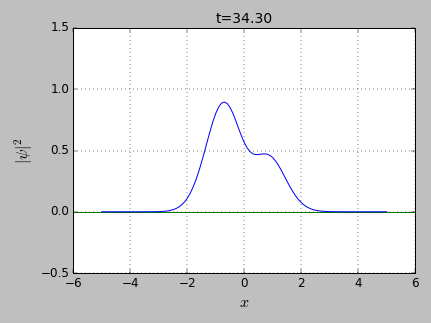

In [4]:
fig = plt.figure()

N = 100        # number of intervals
x = np.linspace(-5, 5, N+1)
plt.grid(True)
plt.ylim(-.5,1.5)
plt.xlabel('$x$')                  # Label for horizontal axis
plt.ylabel("$|\psi|^2$")           # Label for vertical axis
plt.axhline(0,color='green')       # Makes solid green x-axis

y = psiTotal(x,0)
P, = plt.plot(x, abs(y)**2)
ani = animation.FuncAnimation(fig, animate, interval = 100) # interval --> time between frames

#plt.show()  

For the linear combination of $n=0$ and $n=1$ states, I get a period of about $T = 1$.  Compare this with "prediction":

The frequency is 
\begin{eqnarray*}
f = \frac{\Delta E}{h} &=& \frac{\frac{3}{2} - \frac{1}{2}}{1}\\
                       &=& 1
\end{eqnarray*}
which gives the period
$$ T = 1  $$

#### Version information

+ `%version_information` is an IPython magic extension for showing version information for dependency modules in a notebook;

+ See https://github.com/jrjohansson/version_information

+ `%version_information` is available on Bucknell computers on the linux network. You can easily install it on any computer.

In [5]:
%load_ext version_information

In [6]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
matplotlib 3.2.2
Fri Jan 01 14:42:52 2021 EST